# **호텔 예약 취소 여부 예측**
https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

## 0. 데이터 불러오기

- Booking_ID: unique identifier of each booking
- no_of_adults: Number of adults
- no_of_children: Number of Children
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- type_of_meal_plan: Type of meal plan booked by the customer
- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- market_segment_type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- booking_status: Flag indicating if the booking was canceled or not.



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Hotel Reservations.csv')

## 1. EDA

In [4]:
dataset.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
dataset.shape

(36275, 19)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
dataset.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
dataset.select_dtypes(include = 'number')

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,0,0,167.80,1
36271,2,0,1,3,0,228,2018,10,17,0,0,0,90.95,2
36272,2,0,2,6,0,148,2018,7,1,0,0,0,98.39,2
36273,2,0,0,3,0,63,2018,4,21,0,0,0,94.50,0


In [9]:
dataset.select_dtypes(include = 'object')

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,INN00001,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
1,INN00002,Not Selected,Room_Type 1,Online,Not_Canceled
2,INN00003,Meal Plan 1,Room_Type 1,Online,Canceled
3,INN00004,Meal Plan 1,Room_Type 1,Online,Canceled
4,INN00005,Not Selected,Room_Type 1,Online,Canceled
...,...,...,...,...,...
36270,INN36271,Meal Plan 1,Room_Type 4,Online,Not_Canceled
36271,INN36272,Meal Plan 1,Room_Type 1,Online,Canceled
36272,INN36273,Meal Plan 1,Room_Type 1,Online,Not_Canceled
36273,INN36274,Not Selected,Room_Type 1,Online,Canceled


In [10]:
dataset['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [11]:
dataset['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [12]:
dataset['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [13]:
dataset['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [14]:
for i in dataset.columns:
  print(i ,' : ' , dataset[i].unique())
  print()

Booking_ID  :  ['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']

no_of_adults  :  [2 1 3 0 4]

no_of_children  :  [ 0  2  1  3 10  9]

no_of_weekend_nights  :  [1 2 0 4 3 6 5 7]

no_of_week_nights  :  [ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]

type_of_meal_plan  :  ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']

required_car_parking_space  :  [0 1]

room_type_reserved  :  ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']

lead_time  :  [224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134
 320 118 189  16  24   8  10 182 116 123 105 443 317 286 148  14  85  25
  28  80  11 162  82  27 245 266 112  88  69 273   4  97  31  62 197 280
 185 160 104  22 292 1

## 2. 데이터 전처리

In [15]:
dataset = dataset.drop(columns = 'Booking_ID')
dataset.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [16]:
dataset = pd.get_dummies(dataset, drop_first = True) #drop_first=True : 첫번째 카테고리를 사용하지 않음

In [17]:
dataset.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,1,0,1
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,1,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,1,0
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,1,0
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
dataset.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online', 'booking_status_Not_Canceled'],
      dtype='object')

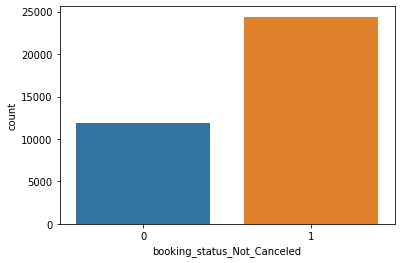

In [19]:
#exploring the target column
sns.countplot(dataset['booking_status_Not_Canceled'])

In [20]:
dataset['booking_status_Not_Canceled'].value_counts()

1    24390
0    11885
Name: booking_status_Not_Canceled, dtype: int64

In [21]:
dataset_2 = dataset.drop(columns = 'booking_status_Not_Canceled')
dataset_2.corrwith(dataset['booking_status_Not_Canceled'])

no_of_adults                           -0.086920
no_of_children                         -0.033078
no_of_weekend_nights                   -0.061563
no_of_week_nights                      -0.092996
required_car_parking_space              0.086185
lead_time                              -0.438538
arrival_year                           -0.179529
arrival_month                           0.011233
arrival_date                           -0.010629
repeated_guest                          0.107287
no_of_previous_cancellations            0.033728
no_of_previous_bookings_not_canceled    0.060179
avg_price_per_room                     -0.142569
no_of_special_requests                  0.253070
type_of_meal_plan_Meal Plan 2          -0.086370
type_of_meal_plan_Meal Plan 3           0.003193
type_of_meal_plan_Not Selected         -0.003072
room_type_reserved_Room_Type 2         -0.000548
room_type_reserved_Room_Type 3          0.001241
room_type_reserved_Room_Type 4         -0.013309
room_type_reserved_R

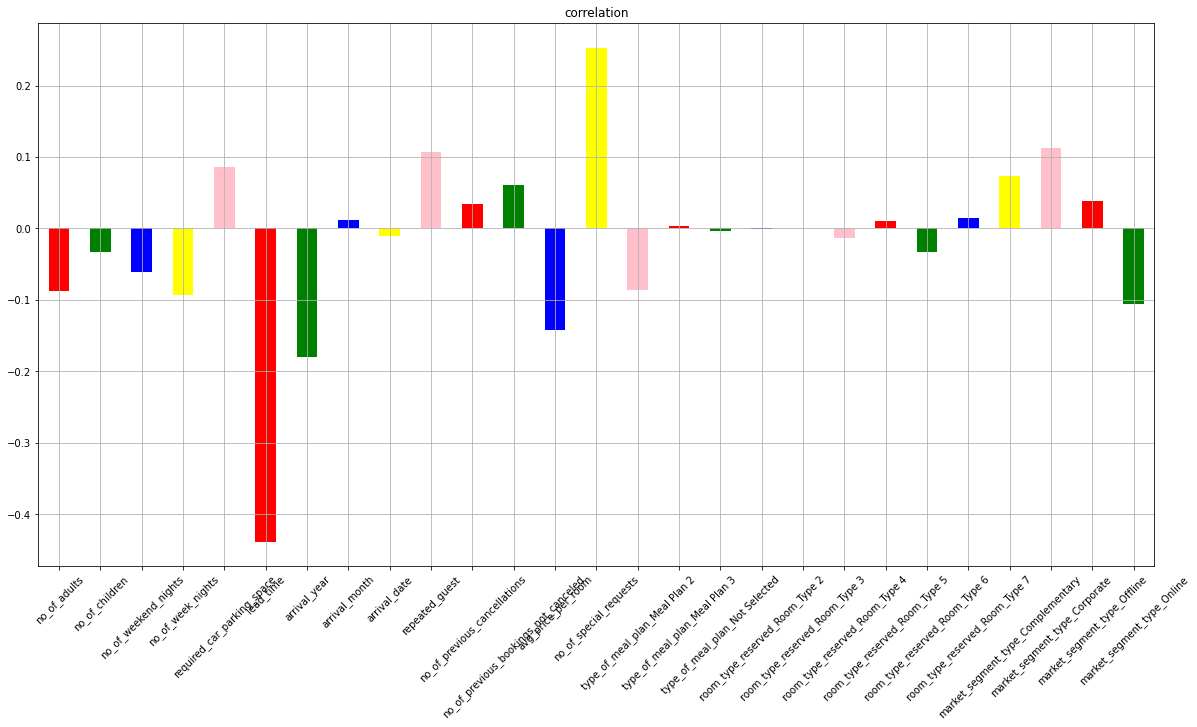

In [22]:
co = ['red','green','blue','yellow','pink']
dataset_2.corrwith(dataset['booking_status_Not_Canceled']).plot.bar(figsize = (20,10), 
                                                                    title = 'correlation', rot = 45, grid = True, color = co)

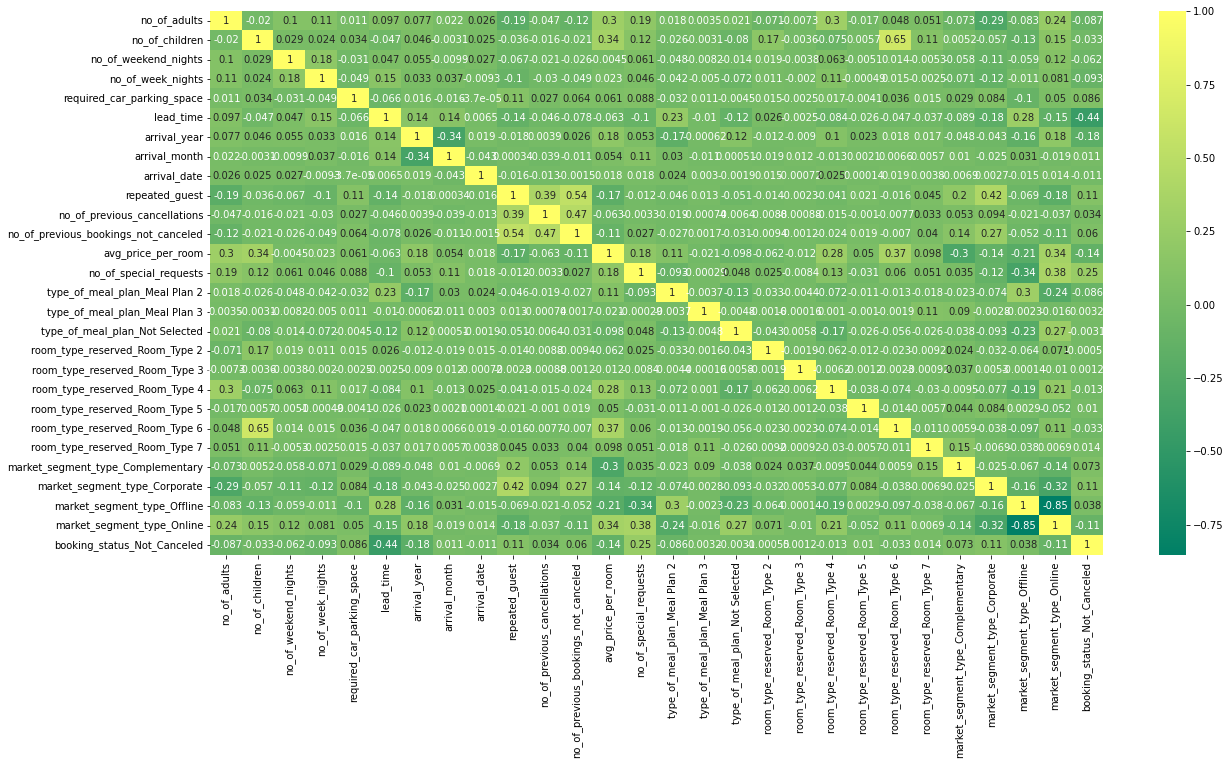

In [27]:
corr = dataset.corr()
plt.figure(figsize= (20,10))
sns.heatmap(corr, annot=True, cmap = 'summer')

https://matplotlib.org/stable/tutorials/colors/colormaps.html

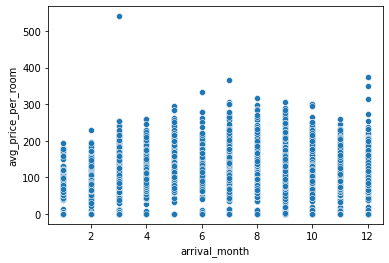

In [28]:
sns.scatterplot(data = dataset, x = 'arrival_month', y = 'avg_price_per_room')

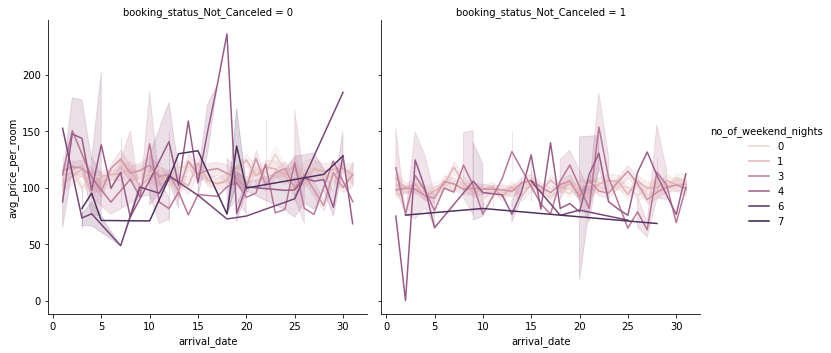

In [29]:
sns.relplot(data = dataset, x = 'arrival_date', y = 'avg_price_per_room', hue = 'no_of_weekend_nights' 
           , col = 'booking_status_Not_Canceled',kind="line") 
#hue는 ggplot2에서 사용한 col 옵션과 비슷
#col은 어떤 변수를 기준으로 나누어 그릴지 정하는 옵션
#kind는 scatter(default)와 line이 존재함. scatterplot을 그릴 지 lineplot을 그릴 지 정하는 옵션

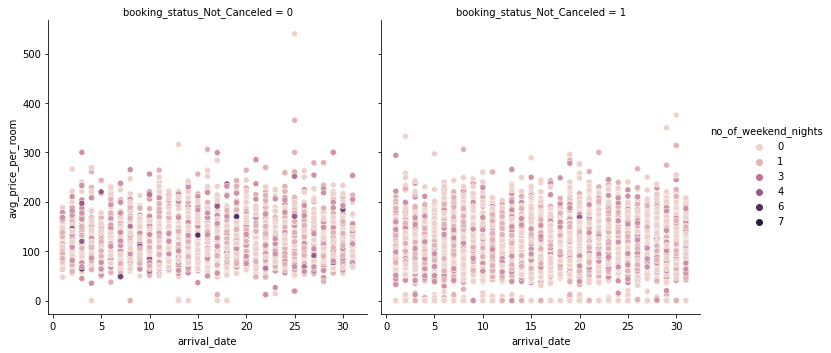

In [30]:
sns.relplot(data = dataset, x = 'arrival_date', y = 'avg_price_per_room', hue = 'no_of_weekend_nights' 
           , col = 'booking_status_Not_Canceled')

In [31]:
x= dataset.drop(columns = 'booking_status_Not_Canceled')
y =dataset['booking_status_Not_Canceled']

In [32]:
x

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,...,0,0,1,0,0,0,0,0,0,1
36271,2,0,1,3,0,228,2018,10,17,0,...,0,0,0,0,0,0,0,0,0,1
36272,2,0,2,6,0,148,2018,7,1,0,...,0,0,0,0,0,0,0,0,0,1
36273,2,0,0,3,0,63,2018,4,21,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
y

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status_Not_Canceled, Length: 36275, dtype: uint8

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.33, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

보통 저희가 training set/test set에서 표준화/정규화/PCA 등, 데이터에 변화를 줄 때 fit_transform() method를 사용해주곤 합니다. 그러나 train/test set을 분리하기 전 fit_transform() method를 사용하면 test set의 데이터가 train set에 반영되기 때문에 data leakage현상 (test set을 미리 알아버려서 데이터가 유출된 현상)이 발생합니다. 이를 예방하기 위하여 다음과 같이 전처리를 해야합니다. 

1. Train set에는 fit 메서드를 사용한 뒤 transform 메서드 사용
2. Test set 에는 transform 메서드 사용

이러면 train set에서 학습된 평균과 분산값이 그대로 test set에 들어가 올바른 예측을 할 수 있도록 합니다. 

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=kiakass&logNo=222085098701

In [35]:
x_train

array([[ 2.24168877, -0.26147739, -0.92921459, ..., -0.24507181,
        -0.64247711,  0.75567237],
       [ 0.30530819, -0.26147739,  0.21949504, ..., -0.24507181,
         1.55647568, -1.32332482],
       [ 0.30530819,  4.68785788, -0.92921459, ..., -0.24507181,
        -0.64247711,  0.75567237],
       ...,
       [ 2.24168877, -0.26147739, -0.92921459, ..., -0.24507181,
        -0.64247711,  0.75567237],
       [-1.63107238, -0.26147739, -0.92921459, ..., -0.24507181,
         1.55647568, -1.32332482],
       [ 0.30530819, -0.26147739, -0.92921459, ..., -0.24507181,
        -0.64247711,  0.75567237]])

In [36]:
x_test

array([[ 2.24168877, -0.26147739,  1.36820468, ..., -0.24507181,
        -0.64247711,  0.75567237],
       [ 0.30530819, -0.26147739, -0.92921459, ..., -0.24507181,
         1.55647568, -1.32332482],
       [ 0.30530819, -0.26147739, -0.92921459, ..., -0.24507181,
         1.55647568, -1.32332482],
       ...,
       [ 0.30530819, -0.26147739,  0.21949504, ..., -0.24507181,
         1.55647568, -1.32332482],
       [ 0.30530819, -0.26147739,  1.36820468, ..., -0.24507181,
        -0.64247711,  0.75567237],
       [ 0.30530819, -0.26147739,  0.21949504, ..., -0.24507181,
        -0.64247711,  0.75567237]])

In [37]:
y_test

16432    1
15128    0
16842    0
5488     0
31896    1
        ..
18705    1
7796     1
8282     1
34139    1
6926     0
Name: booking_status_Not_Canceled, Length: 11971, dtype: uint8

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [39]:
y_pred = logreg.predict(x_test)

In [40]:
#performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results

,Model,Accuracy Score,F1 score,Precision,Recall
0,Logistic Regression,0.803275,0.858804,0.830473,0.889137
